In [1]:
#include "TCanvas.h"
#include "TROOT.h"
#include "TGraphErrors.h"
#include "TF1.h"
#include "TLegend.h"
#include "TLatex.h"
#include "TRandom.h"     
#include "TH1F.h"      
#include "TFile.h"

#include <math.h>
#include <cmath>

In [1]:
%jsroot on

In [58]:
double tau = 8;
int n = 10000;


auto hist1 = new TH1F ("hist1", "histogram_1", 100, 0, 50);
auto hist2 = new TH1F ("hist2", "histogram_2", 100, 0, 50);
    
TRandom3 rnd;
TF1 exp_func("exp_func", the_exp_func, 0, 50, 2);
const Double_t par_tau = tau;
exp_func.SetParameters(&par_tau, 1);
exp_func.SetParNames("Tau", "A");
for (int i = 0; i < n; i++)
{
    double r = rnd.Rndm();
    double log_sample = -tau * log(r);
    double exp_sample = 1/tau * rnd.Exp(tau);
    hist1->Fill(exp_func.GetRandom());
    hist2->Fill(log_sample);
}
auto canvas = new TCanvas();

hist1->SetLineColor(kRed);
hist1->SetFillStyle(0);
hist2->SetLineColor(kBlue);
hist2->SetFillStyle(0);
hist2->DrawNormalized();
hist1->Fit("exp_func");    

//TCanvas c("Histograms","Title", 0, 10);
canvas->SetGrid();
//hist1->Draw();
//hist2->Draw("SAME");
//hist2->Fit("expo", "S");
//hist1->Fit("expo", "+");

canvas->Draw();

input_line_204:12:10: error: no matching member function for call to 'SetParameters'
exp_func.SetParameters(&par_tau, 1);
~~~~~~~~~^~~~~~~~~~~~~
/home/valentina/anaconda3/envs/root_env/include/TF1.h:649:21: note: candidate function not viable: no known conversion from 'const Double_t *' (aka 'const double *') to 'Double_t' (aka 'double') for 1st argument; remove &
   virtual void     SetParameters(Double_t p0, Double_t p1, Double_t p2 = 0, Double_t p3 = 0, Double_t p4 = 0,
                    ^
/home/valentina/anaconda3/envs/root_env/include/TF1.h:644:21: note: candidate function not viable: requires single argument 'params', but 2 arguments were provided
   virtual void     SetParameters(const Double_t *params)
                    ^


In [59]:
Double_t the_exp_func(Double_t *var, Double_t *par)
{
    return par[1] * TMath::Exp(-var[0]/par[0]);
    //return TMath::Exp(-var[0]/par[0]);

}

Построим две гистограммы: 
1. Экспоненциального распределения:
$$f(t; \tau) = \exp{(-\dfrac{t}{\tau})}$$
2. Основаную на выборке, полученной из "обращения" функции экспоненциального распределения:
$$t(u) = -\tau \ln{u} $$ где $u$ ~ $U(0, 1)$
Увидим, что они распределены одинаково (согласно теореме). Фитируем их встроенной экпоненциальной функцией ($"expo" = \exp{(p_0)} \exp{(p_1 t)}$), построим гистограммы для выборок разного размера, пронаблюдаем за точностью приближения параметра $\tau$.

In [151]:
// ЛОГ шкала ???
// ФИТ 
// подписи осей (см. example.cpp)

TFitResultPtr Decay(int n, double tau)
{
    double rbound = tau * 5;
    auto hist1 = new TH1F ("hist1", "Exponential distribution", 100, 0, rbound);
    auto hist2 = new TH1F ("hist2", "Inverse Transformed", 100, 0, rbound);
    
    TRandom3 rnd;
    TF1 exp_func("exp_func", the_exp_func, 0, rbound, 1);
    const Double_t par_tau = tau;
    exp_func.SetParameters(&par_tau);
    exp_func.SetParNames("Tau");
    for (int i = 0; i < n; i++)
    {
        double r = rnd.Rndm();
        double log_sample = -tau * log(r);
        double exp_sample = rnd.Exp(tau);
        hist1->Fill(exp_sample);
        hist2->Fill(log_sample);
    }
    hist1->SetLineColor(kBlue);
    hist1->SetFillStyle(0);
    hist2->SetLineColor(kRed);
    hist1->SetFillStyle(0);
    hist1->Draw();
    //hist1->Fit("expo", "Q");    

    hist2->Draw("SAME");
    //exp_func.Draw("Same");
    TFitResultPtr fitRes = hist2->Fit("expo", "S");
    return fitRes;
    
}

### распад $ K^0_s$

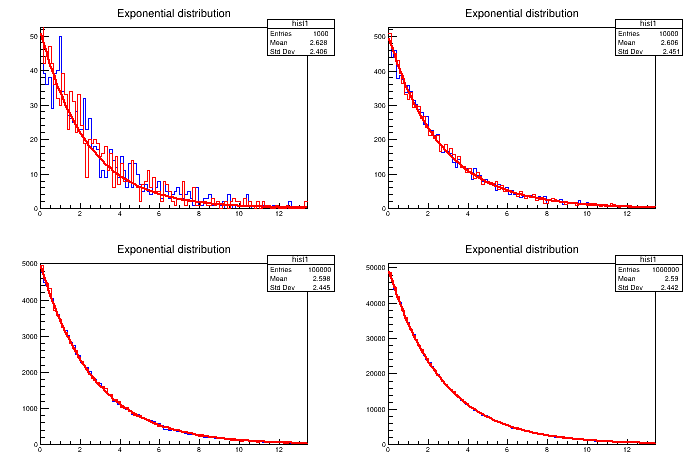

 FCN=91.0773 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.85879e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.94626e+00   5.04921e-02   1.55968e-04   1.56196e-03
   2  Slope       -4.23085e-01   1.67904e-02   5.18440e-05   2.62044e-04


 For sample size = 1000 : tau = 2.36359


 FCN=101.927 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.73696e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.22474e+00   1.45710e-02   4.99658e-05   1.96996e-03
   2  Slope       -3.80528e-01   4.12822e-03   1.41564e-05   2.02586e-03


 For sample size = 10 000 : tau = 2.62793


 FCN=86.8694 FRO

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).


In [155]:
double tau1 = 2.6842; // cm

TCanvas canvas1 = new TCanvas("canvas1","canvas1", 100, 100);
canvas1.Divide(2,2);

canvas1.cd(1);
fval1 = Decay(1000, tau1);
std::cout << "\n\n For sample size = 1000 : tau = " << -1/fval1->Value(1)  << "\n\n" << std::endl;

canvas1.cd(2);
fval2 = Decay(10000, tau1);
std::cout << "\n\n For sample size = 10 000 : tau = " << -1/fval2->Value(1)  << "\n\n" << std::endl;

canvas1.cd(3);
fval3 = Decay(100000, tau1);
std::cout << "\n\n For sample size = 100 000 : tau = " << -1/fval3->Value(1)  << "\n\n" << std::endl;

canvas1.cd(4);
fval4 = Decay(1000000, tau1);
std::cout << "\n\n For sample size = 1 000 000 : tau = " << -1/fval4->Value(1)  << "\n\n" << std::endl;


canvas1.Draw();

### распад $\Lambda, \bar\Lambda$

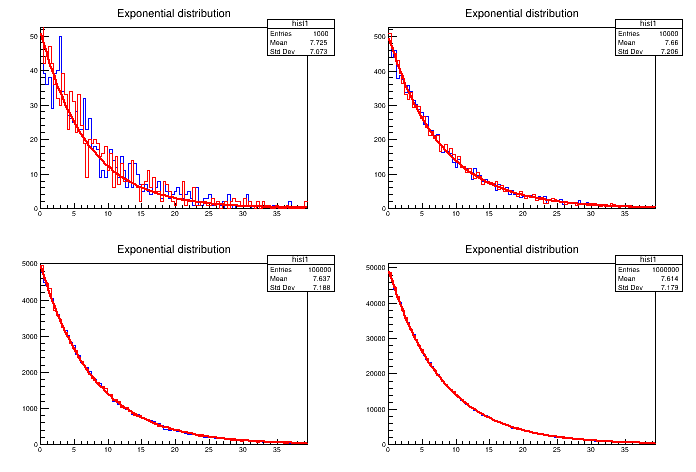

 FCN=91.0773 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.85878e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.94626e+00   5.04921e-02   1.55968e-04   1.56196e-03
   2  Slope       -1.43935e-01   5.71212e-03   1.76375e-05   7.70288e-04


 For sample size = 1000 : tau = 6.9476


 FCN=101.927 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.73697e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.22474e+00   1.45710e-02   4.99658e-05   1.96996e-03
   2  Slope       -1.29457e-01   1.40443e-03   4.81603e-06   5.95481e-03


 For sample size = 10 000 : tau = 7.7246


 FCN=86.8694 FROM 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).


In [146]:
double tau2 = 7.89; // cm

TCanvas canvas1 = new TCanvas("canvas1","canvas1", 100, 100);
canvas1.Divide(2,2);


canvas1.cd(1);
fval1 = Decay(1000, tau2);
std::cout << "\n\n For sample size = 1000 : tau = " << -1/fval1->Value(1)  << "\n\n" << std::endl;

canvas1.cd(2);
fval2 = Decay(10000, tau2);
std::cout << "\n\n For sample size = 10 000 : tau = " << -1/fval2->Value(1)  << "\n\n" << std::endl;

canvas1.cd(3);
fval3 = Decay(100000, tau2);
std::cout << "\n\n For sample size = 100 000 : tau = " << -1/fval3->Value(1)  << "\n\n" << std::endl;

canvas1.cd(4);
fval4 = Decay(1000000, tau2);
std::cout << "\n\n For sample size = 1 000 000 : tau = " << -1/fval4->Value(1)  << "\n\n" << std::endl;

canvas1.Draw();

Ясно, что с ростом размера выборки растет точность определения параметров распределения, гистограмма "сглаживается"